In [1]:
import numpy as np
def generate_data():
    seed = 2
    rdm = np.random.RandomState(seed)
    X = rdm.randn(300, 2)
    Y = [[int(x_0 * x_0 + x_1 * x_1 < 2)] for (x_0, x_1) in X]
    return X, Y

In [2]:
import tensorflow as tf
def forward(x, regularizer):
    w1 = get_weight([2, 11], regularizer)
    b1 = get_bias([11])
    w2 = get_weight([11, 1], regularizer)
    b2 = get_bias([1])
    a1 = tf.nn.relu(tf.matmul(x, w1) + b1)
    y = tf.matmul(a1, w2) + b2
    return y
def get_weight(shape, regularizer):
    w = tf.Variable(tf.random_normal(shape), dtype=tf.float32)
    tf.add_to_collection("losses", tf.contrib.layers.l2_regularizer(regularizer)(w))
    return w
def get_bias(shape):
    b = tf.Variable(tf.constant(0.01, shape=shape))
    return b

In [3]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6, 4)


LEARNING_RATE_BASE = 0.001
LEARNING_RATE_DECAY = 0.999
REGULARIZER = 0.01
BATCH_SIZE = 30
STEPS = 40000

def backword():
    X, Y = generate_data()
    
    x = tf.placeholder(tf.float32, shape=(None, 2))
    y = tf.placeholder(tf.float32, shape=(None, 1))
    
    y_hat = forward(x, REGULARIZER)
    
    loss_mes = tf.reduce_mean(tf.square(y - y_hat), 0)
    loss_total = loss_mes + tf.add_n(tf.get_collection("losses"))
    
    global_step = tf.Variable(0, trainable=False)
    
    learning_rate = tf.train.exponential_decay(LEARNING_RATE_BASE,
                                               global_step, 
                                               300/BATCH_SIZE, 
                                               LEARNING_RATE_DECAY,
                                               staircase=True)
    
    train = tf.train.AdamOptimizer(0.0001).minimize(loss_total)
    
    with tf.Session() as sess:
        init = tf.global_variables_initializer()
        sess.run(init)
        for i in range(STEPS):
            start = (i * BATCH_SIZE) % 300
            end = start + BATCH_SIZE
            sess.run(train, feed_dict={x: X[start:end], y:Y[start:end]})
            if i % 4000 == 0:
                loss_value = sess.run(loss_total, feed_dict={x:X, y:Y})
                print("After %d steps, loss is %f" % (i, loss_value))
        
        xx, yy = np.mgrid[-3:3:0.01, -3:3:0.01]
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = sess.run(y_hat, feed_dict={x: grid})
        probs = probs.reshape(xx.shape)
        
    plt.scatter(X[:,0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
    plt.contour(xx, yy, probs, levels=[0.5])
    plt.show()

Instructions for updating:
Use the retry module or similar alternatives.
After 0 steps, loss is 5.619515
After 4000 steps, loss is 0.531954
After 8000 steps, loss is 0.266992
After 12000 steps, loss is 0.225826
After 16000 steps, loss is 0.199308
After 20000 steps, loss is 0.179457
After 24000 steps, loss is 0.164138
After 28000 steps, loss is 0.151370
After 32000 steps, loss is 0.140720
After 36000 steps, loss is 0.132009


D:\soft\Ana\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
D:\soft\Ana\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


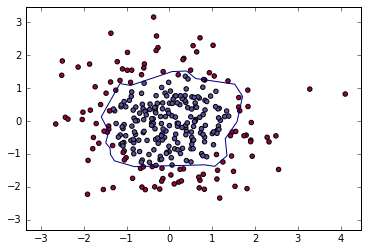

In [4]:
if __name__ == "__main__":
    backword()